# Distributed Password Guessing Attack Detection using Network Flow Data with Decision Tree Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Fetching

In [ ]:
df4 = pd.read_csv("4-Rbot-20110815.binetflow.csv")     # Distributed Password Guessing Attack

In [ ]:
df4.shape

(1121076, 15)

In [ ]:
df4.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/15 11:00:30.431541,1.277892,tcp,94.162.236.67,1958,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
1,2011/08/15 11:01:10.611515,1.041958,tcp,88.212.36.177,44942,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
2,2011/08/15 11:01:27.583624,1.259001,tcp,94.44.50.44,55008,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
3,2011/08/15 11:01:39.768866,1.129427,tcp,94.165.0.151,3079,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
4,2011/08/15 11:02:08.855606,1.279737,tcp,94.44.59.251,4390,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt


### Data Preprocessing

In [ ]:
df4 = df4.drop('Dir', axis =1)

In [ ]:
df4.dropna(inplace=True)

In [ ]:
nRow, nCol = df4.shape
print(f'This Dataset has {nRow} rows and {nCol} columns')

This Dataset has 1031775 rows and 14 columns


In [ ]:
for i, col in enumerate(df4.columns):
    print(i, col)

0 StartTime
1 Dur
2 Proto
3 SrcAddr
4 Sport
5 DstAddr
6 Dport
7 State
8 sTos
9 dTos
10 TotPkts
11 TotBytes
12 SrcBytes
13 Label


In [ ]:
df4.dtypes

StartTime     object
Dur          float64
Proto         object
SrcAddr       object
Sport         object
DstAddr       object
Dport         object
State         object
sTos         float64
dTos         float64
TotPkts        int64
TotBytes       int64
SrcBytes       int64
Label         object
dtype: object

In [ ]:
df4['Label'].value_counts()

flow=To-Background-UDP-CVUT-DNS-Server                    483298
flow=Background-UDP-Established                           246234
flow=Background-TCP-Established                           133980
flow=Background-Established-cmpgw-CVUT                     98765
flow=Background-TCP-Attempt                                14527
flow=From-Normal-V45-Stribrek                              12133
flow=To-Background-CVUT-Proxy                              10773
flow=From-Normal-V45-Jist                                  10479
flow=Background                                             6668
flow=From-Normal-V45-Grill                                  2449
flow=To-Background-CVUT-WebServer                           1676
flow=Background-UDP-NTP-Established-1                       1522
flow=Background-google-webmail                               752
flow=Background-google-analytics10                           562
flow=Background-google-analytics16                           551
flow=Background-google-an

In [ ]:
# Create a new column and initialize with 'Benign'
df4['Attack_Label'] = 'Benign'


In [ ]:
df4.loc[df4["Label"].str.contains("botnet", case=False), "Attack_Label"] = "Distributed Password Guessing Attack"

In [ ]:
df4[df4['Label'].str.contains("botnet", case=False)]

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Attack_Label
1077,2011/08/15 11:00:12.932584,30.359243,tcp,147.32.84.165,1089,208.73.210.29,80,SPA_FSRPA,0.0,0.0,11,2355,412,flow=From-Botnet-V45-TCP-Established-HTTP-Ad-15,Distributed Password Guessing Attack
247872,2011/08/15 11:57:16.094347,0.000427,udp,147.32.84.165,1025,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V45-UDP-DNS,Distributed Password Guessing Attack
247991,2011/08/15 11:57:18.344004,0.019812,udp,147.32.84.165,1025,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V45-UDP-DNS,Distributed Password Guessing Attack
247992,2011/08/15 11:57:18.365188,0.046706,tcp,147.32.84.165,1027,74.125.232.204,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V45-TCP-HTTP-Google-Net-Estab...,Distributed Password Guessing Attack
267773,2011/08/15 12:02:18.420991,0.201004,udp,147.32.84.165,1025,147.32.80.9,53,CON,0.0,0.0,2,505,78,flow=From-Botnet-V45-UDP-DNS,Distributed Password Guessing Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108482,2011/08/15 15:08:27.980762,0.401563,tcp,147.32.84.165,4433,91.212.135.158,5678,FSPA_FSPA,0.0,0.0,14,4989,587,flow=From-Botnet-V45-TCP-CC73-Not-Encrypted,Distributed Password Guessing Attack
1110997,2011/08/15 15:09:01.028179,0.420158,tcp,147.32.84.165,4622,91.212.135.158,5678,FSPA_FSPA,0.0,0.0,14,5004,587,flow=From-Botnet-V45-TCP-CC73-Not-Encrypted,Distributed Password Guessing Attack
1113081,2011/08/15 15:09:34.076130,0.463916,tcp,147.32.84.165,4791,91.212.135.158,5678,FSPA_FSPA,0.0,0.0,14,4990,587,flow=From-Botnet-V45-TCP-CC73-Not-Encrypted,Distributed Password Guessing Attack
1115495,2011/08/15 15:10:07.123278,0.444983,tcp,147.32.84.165,1077,91.212.135.158,5678,FSPA_FSPA,0.0,0.0,14,5003,587,flow=From-Botnet-V45-TCP-CC73-Not-Encrypted,Distributed Password Guessing Attack


In [ ]:
# Drop the original 'Label' column and rename the new column to 'Label'
df4.drop('Label', axis=1, inplace=True)
df4.rename(columns={'Attack_Label': 'Label'}, inplace=True)

In [ ]:
df4['Label'].value_counts()

Benign                                  1031638
Distributed Password Guessing Attack        137
Name: Label, dtype: int64

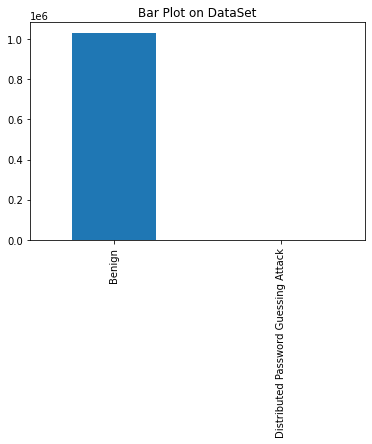

In [ ]:
# statistical counts of genuine flows and password guessing attack flows
counts = df4['Label'].value_counts()
counts.plot(kind = 'bar')
plt.title('Bar Plot on DataSet')
plt.show()

In [ ]:
df4.sample(n=20)

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
970524,2011/08/15 14:37:15.210320,0.020335,udp,147.32.86.53,59843,147.32.80.9,53,CON,0.0,0.0,2,257,82,Benign
841400,2011/08/15 14:06:46.470042,0.000460,udp,200.71.148.142,39179,147.32.84.229,13363,CON,0.0,0.0,2,231,169,Benign
556238,2011/08/15 13:06:22.642380,0.000199,udp,147.32.86.155,59665,147.32.80.9,53,CON,0.0,0.0,2,206,78,Benign
970372,2011/08/15 14:37:13.162568,0.003505,udp,219.81.160.112,14737,147.32.84.229,13363,CON,0.0,0.0,4,2997,60,Benign
995902,2011/08/15 14:43:24.077250,0.000540,udp,93.33.248.34,2778,147.32.84.229,13363,CON,0.0,0.0,2,132,72,Benign
673495,2011/08/15 13:30:12.041090,18.404772,tcp,147.32.84.134,56949,74.125.232.212,80,FSA_FSA,0.0,0.0,6,412,272,Benign
64735,2011/08/15 11:13:47.647684,0.000225,udp,147.32.85.34,52094,147.32.80.9,53,CON,0.0,0.0,2,326,85,Benign
145977,2011/08/15 11:31:46.863553,0.000221,udp,147.32.84.138,58127,147.32.80.9,53,CON,0.0,0.0,2,214,81,Benign
920145,2011/08/15 14:25:12.271970,0.000224,udp,147.32.86.53,57648,147.32.80.9,53,CON,0.0,0.0,2,251,69,Benign
580082,2011/08/15 13:11:26.186131,0.025268,udp,147.32.84.59,42314,147.32.80.9,53,CON,0.0,0.0,2,531,76,Benign


Feature Scaling

In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = df4.select_dtypes(include=['float64','int64']).columns
sc_df = scaler.fit_transform(df4.select_dtypes(include=['float64','int64']))


# turn the result back to a dataframe
sc_df = pd.DataFrame(sc_df, columns = cols)

In [ ]:
categorical_cols = df4.select_dtypes(include='O').keys()

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Loop through each categorical column and apply label encoding
for col in categorical_cols:
    le = LabelEncoder()
    df4[col] = le.fit_transform(df4[col].astype(str))

### Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a 70:30 ratio
train_X, test_X, train_Y, test_Y = train_test_split(df4.drop('Label', axis=1), df4['Label'], test_size=0.3, random_state=42)


In [ ]:
train_X.shape

(722242, 13)

In [ ]:
train_X.head()

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes
383120,353555,0.013105,4,22572,52245,9771,25387,6,0.0,0.0,2,222,71
1026300,943326,0.008511,0,22579,0,19992,251,7,0.0,0.0,2,196,98
992833,911827,0.000371,4,22391,33622,9771,25387,6,0.0,0.0,2,214,81
505278,466098,0.000266,4,22541,42104,9771,25387,6,0.0,0.0,2,230,90
987254,906604,0.000323,4,22391,52821,9771,25387,6,0.0,0.0,2,214,81


In [ ]:
train_Y.head()

383120     0
1026300    0
992833     0
505278     0
987254     0
Name: Label, dtype: int64

### Model Training and Prediction

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()   
model.fit(train_X, train_Y)

DecisionTreeClassifier()

In [ ]:
y_preds = model.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn

Text(33.0, 0.5, 'Predicted labels')

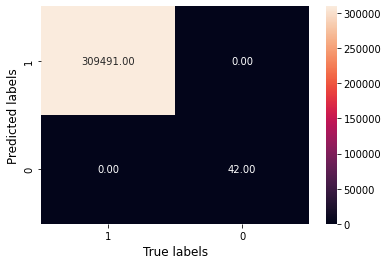

In [ ]:
cm_dt = confusion_matrix(test_Y, y_preds)
sn.heatmap(cm_dt, annot=True,  fmt='.2f', xticklabels = [1, 0] , yticklabels = [1,0],cbar=True)
plt.xlabel('True labels',fontsize=12)
plt.ylabel('Predicted labels',fontsize=12)

In [ ]:

print("Detection Accuracy: ", accuracy_score(test_Y, y_preds)*100,"%")

Detection Accuracy:  100.0 %


### Export Model

In [ ]:
import pickle

pickle.dump(model, open("NF-4-Password-Attack.pkl", "wb"))